In [ ]:
folder_name = 'smoothing0_25-classweight'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import re

import keras
from keras.layers import Embedding
import tensorflow as tf
from keras.preprocessing.text import text_to_word_sequence
from tensorflow.keras.callbacks import CSVLogger
from sklearn.model_selection import train_test_split

In [ ]:
!wget https://github.com/AIkingman/2_middle_prj/raw/main/train.csv
!wget https://github.com/AIkingman/2_middle_prj/raw/main/test.csv

--2023-10-12 19:41:22--  https://github.com/AIkingman/2_middle_prj/raw/main/train.csv
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AIkingman/2_middle_prj/main/train.csv [following]
--2023-10-12 19:41:22--  https://raw.githubusercontent.com/AIkingman/2_middle_prj/main/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68597918 (65M) [text/plain]
Saving to: ‘train.csv’

train.csv           100%[===================>]  65.42M   255MB/s    in 0.3s    

2023-10-12 19:41:23 (255 MB/s) - ‘train.csv’ saved [68597918/68597918]

--2023-10-12 19:41:23--  https://github.com/AIkingman/2_middle_prj/r

In [ ]:
data = pd.read_csv("/content/train.csv")

In [ ]:
!wget https://github.com/Hwan-ho/class.NLP/raw/main/glove.6B.100d.zip

--2023-10-12 19:41:26--  https://github.com/Hwan-ho/class.NLP/raw/main/glove.6B.100d.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Hwan-ho/class.NLP/main/glove.6B.100d.zip [following]
--2023-10-12 19:41:26--  https://raw.githubusercontent.com/Hwan-ho/class.NLP/main/glove.6B.100d.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29583894 (28M) [application/zip]
Saving to: ‘glove.6B.100d.zip’

glove.6B.100d.zip   100%[===================>]  28.21M   180MB/s    in 0.2s    

2023-10-12 19:41:26 (180 MB/s) - ‘glove.6B.100d.zip’ saved [29583894/29583894]



In [ ]:
!wget https://github.com/Hwan-ho/class.NLP/raw/main/glove.6B.100d.z01

--2023-10-12 19:41:27--  https://github.com/Hwan-ho/class.NLP/raw/main/glove.6B.100d.z01
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Hwan-ho/class.NLP/main/glove.6B.100d.z01 [following]
--2023-10-12 19:41:27--  https://raw.githubusercontent.com/Hwan-ho/class.NLP/main/glove.6B.100d.z01
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 104857600 (100M) [application/octet-stream]
Saving to: ‘glove.6B.100d.z01’

glove.6B.100d.z01   100%[===================>] 100.00M   198MB/s    in 0.5s    

2023-10-12 19:41:28 (198 MB/s) - ‘glove.6B.100d.z01’ saved [104857600/104857600]



In [ ]:
!zip -F /content/glove.6B.100d.zip --out /content/glove.zip
!unzip /content/glove.zip

Fix archive (-F) - assume mostly intact archive
 copying: glove.6B.100d.txt
Archive:  /content/glove.zip
  inflating: glove.6B.100d.txt       


In [ ]:
embedding_dict = dict()

f = open('/content/glove.6B.100d.txt', encoding="utf8")
i=0
for line in f:
    word_vector = line.split()
    word = word_vector[0]

    # 100개의 값을 가지는 array로 변환
    word_vector_arr = np.asarray(word_vector[1:], dtype='float32')
    embedding_dict[word] = word_vector_arr
    i+=1
print(i)
f.close()

400000


In [ ]:
data=data.drop(columns=['id'])

In [ ]:
i = 0
while i < len(data):
  data["comment_text"][i]= re.sub(r"'\n'<br />|\b\\\w+\B|-|´|\'", " ", data["comment_text"][i])
  data["comment_text"][i] = re.sub(r"([!\"#$%&'()*+, -\./:;<=>?@\[\\]^_`{|}~])", " ", data["comment_text"][i])
  data["comment_text"][i] = re.sub(r"([\.!*\?~;])", " ", data["comment_text"][i])
  data["comment_text"][i] = re.sub('(([a-zA-Z0-9])\\2{2,})', " ", data["comment_text"][i])
  i += 1
  print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64


<ipython-input-11-bdc671047540>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["comment_text"][i]= re.sub(r"'\n'<br />|\b\\\w+\B|-|´|\'", " ", data["comment_text"][i])
<ipython-input-11-bdc671047540>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["comment_text"][i] = re.sub(r"([!\"#$%&'()*+, -\./:;<=>?@\[\\]^_`{|}~])", " ", data["comment_text"][i])
<ipython-input-11-bdc671047540>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
154572
154573
154574
154575
154576
154577
154578
154579
154580
154581
154582
154583
154584
154585
154586
154587
154588
154589
154590
154591
154592
154593
154594
154595
154596
154597
154598
154599
154600
154601
154602
154603
154604
154605
154606
154607
154608
154609
154610
154611
154612
154613
154614
154615
154616
154617
154618
154619
154620
154621
154622
154623
154624
154625
154626
154627
154628
154629
154630
154631
154632
154633
154634
154635
154636
154637
154638
154639
154640
154641
154642
154643
154644
154645
154646
154647
154648
154649
154650
154651
154652
154653
154654
154655
154656
154657
154658
154659
154660
154661
154662
154663
154664
154665
154666
154667
154668
154669
154670
154671
154672
154673
154674
154675
154676
154677
154678
154679
154680
154681
154682
154683
154684
154685
154686
154687
154688
154689
154690
154691
154692
154693
154694
154695
154696
154697
154698
154699
154700
154701
154702
154703
154704
154705
154706
154707
154708
15470

In [ ]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

In [ ]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

In [ ]:
tokenLength = []
i = 0
while i < len(data):
  data["comment_text"][i]= stemmer.stem(data["comment_text"][i])
  tokenLength.append(len(data["comment_text"][i].split(' ')))
  i += 1
  print(i)

<ipython-input-13-312b361fe5e5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["comment_text"][i]= stemmer.stem(data["comment_text"][i])


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
154572
154573
154574
154575
154576
154577
154578
154579
154580
154581
154582
154583
154584
154585
154586
154587
154588
154589
154590
154591
154592
154593
154594
154595
154596
154597
154598
154599
154600
154601
154602
154603
154604
154605
154606
154607
154608
154609
154610
154611
154612
154613
154614
154615
154616
154617
154618
154619
154620
154621
154622
154623
154624
154625
154626
154627
154628
154629
154630
154631
154632
154633
154634
154635
154636
154637
154638
154639
154640
154641
154642
154643
154644
154645
154646
154647
154648
154649
154650
154651
154652
154653
154654
154655
154656
154657
154658
154659
154660
154661
154662
154663
154664
154665
154666
154667
154668
154669
154670
154671
154672
154673
154674
154675
154676
154677
154678
154679
154680
154681
154682
154683
154684
154685
154686
154687
154688
154689
154690
154691
154692
154693
154694
154695
154696
154697
154698
154699
154700
154701
154702
154703
154704
154705
154706
154707
154708
15470

In [ ]:
from keras.layers import TextVectorization

In [ ]:
VOCAB_SIZE = 10000 #len(embedding_dict)
encoder = TextVectorization(max_tokens=VOCAB_SIZE, ragged=True) # ragged array: 열의 갯수가 행마다 다른 행렬, tensorflow는 감사하게도 ragged tensor를 지원함
encoder.adapt(data["comment_text"])

In [ ]:
voc = encoder.get_vocabulary()
word_index = dict(zip(voc, range(len(voc))))

In [ ]:
encoder.vocabulary_size()

10000

In [ ]:
print(len(voc))
voc[:20]

10000


['',
 '[UNK]',
 'the',
 'to',
 'i',
 'of',
 'and',
 'you',
 'a',
 'is',
 'that',
 'it',
 'in',
 'for',
 'this',
 'not',
 'on',
 'be',
 'as',
 'have']

In [ ]:
num_tokens = len(voc) + 2
embedding_dim = 100
hits = 0
misses = 0
missedList = []

# Prepare embedding matrix
embedding_matrix = np.zeros((num_tokens, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embedding_dict.get(word)
    if embedding_vector is not None:
        # Words not found in embedding index will be all-zeros.
        # This includes the representation for "padding" and "OOV"
        embedding_matrix[i] = embedding_vector
        hits += 1
    else:
        missedList.append(word)
        misses += 1
print("Converted %d words (%d misses)" % (hits, misses))

Converted 9630 words (370 misses)


In [ ]:
len(missedList)

370

In [ ]:
embedding_layer = Embedding(
    num_tokens,
    embedding_dim,
    embeddings_initializer=keras.initializers.Constant(embedding_matrix),
    trainable=False,
)

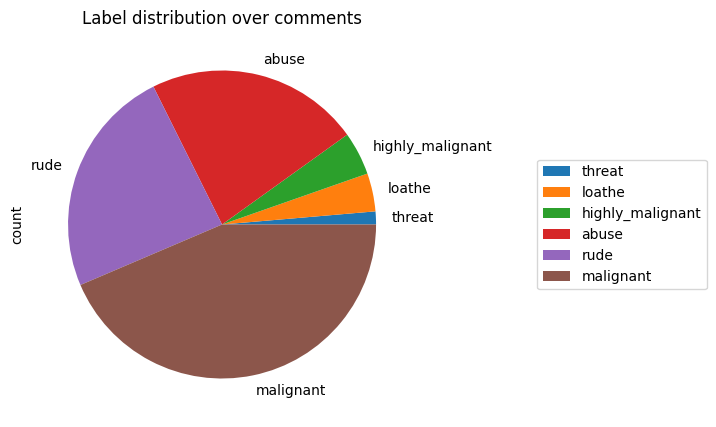

In [ ]:

cols_target = ['malignant','highly_malignant','rude','threat','abuse','loathe']
df_distribution = data[cols_target].sum()\
                            .to_frame()\
                            .rename(columns={0: 'count'})\
                            .sort_values('count')

df_distribution.plot.pie(y='count',
                                      title='Label distribution over comments',
                                      figsize=(5, 5))\
                            .legend(loc='center left', bbox_to_anchor=(1.3, 0.5))

In [ ]:
target_data = data[cols_target]

data['bad'] =data[cols_target].sum(axis =1)
print(data['bad'].value_counts())
data['bad'] = data['bad'] > 0
data['bad'] = data['bad'].astype(int)
print(data['bad'].value_counts())

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
Name: bad, dtype: int64
0    143346
1     16225
Name: bad, dtype: int64


In [ ]:
ct = np.array(data['comment_text'])
sum_target = np.array(data['bad'])

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(ct, sum_target, test_size=0.2, random_state=2023)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=2023)

In [ ]:
inputText = keras.Input(shape=(1), dtype=tf.string)
encodedText = encoder(inputText)
embeddedText = embedding_layer(encodedText)
x = keras.layers.SimpleRNN(256, return_sequences=False, activation='relu')(embeddedText) # return_sequences=False -> 가장 마지막 output만 return
output = keras.layers.Dense(1,activation='sigmoid')(x)

myMdl = keras.Model(inputText, output, name="myMdl")
myMdl_wordEmbedding = keras.Model(inputText,embeddedText, name="wordEmbedding") # word embedding 결과 확인용

In [ ]:
csv_logger = CSVLogger('/content/drive/MyDrive/ai_project_2/'+folder_name+'/training.csv', separator=",", append=True)
mcp_save_best = tf.keras.callbacks.ModelCheckpoint(
    '/content/drive/MyDrive/ai_project_2/'+folder_name+'/{epoch:02d}-{val_loss:.5f}_best', save_best_only=True,
    monitor='val_loss', verbose=1, mode='min')
mcp_save = tf.keras.callbacks.ModelCheckpoint(
    '/content/drive/MyDrive/ai_project_2/'+folder_name+'/{epoch:02d}-{val_loss:.5f}', save_best_only=False,
    monitor='val_loss', verbose=1, mode='min')

In [ ]:
focal_loss = tf.keras.losses.BinaryFocalCrossentropy(alpha=0.25,gamma=2.0,label_smoothing=0.2)

In [ ]:
neg, pos = np.bincount(Y_train)
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 102124
    Positive: 10345 (10.13% of total)



In [ ]:
weight_for_0 = (1 / neg) * (total / 2.0)
weight_for_1 = (1 / pos) * (total / 2.0)

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.56
Weight for class 1: 4.94


In [ ]:
myMdl.compile(optimizer=tf.keras.optimizers.Adam(1e-4),loss=focal_loss, metrics=['accuracy'])
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min')
history = myMdl.fit(x=X_train, y=Y_train, validation_data=(X_val, Y_val), batch_size=2048, epochs=1000,
                    validation_split=0.2, callbacks=[earlyStopping, mcp_save, mcp_save_best, csv_logger], class_weight=class_weight)

Epoch 1/1000
50/50 [==============================] - ETA: 0s - loss: 0.1710 - accuracy: 0.5981
Epoch 1: saving model to /content/drive/MyDrive/ai_project_2/smoothing0_25-classweight/01-0.15172

Epoch 1: val_loss improved from inf to 0.15172, saving model to /content/drive/MyDrive/ai_project_2/smoothing0_25-classweight/01-0.15172_best
50/50 [==============================] - 86s 2s/step - loss: 0.1710 - accuracy: 0.5981 - val_loss: 0.1517 - val_accuracy: 0.6900
Epoch 2/1000
50/50 [==============================] - ETA: 0s - loss: 0.1402 - accuracy: 0.7218
Epoch 2: saving model to /content/drive/MyDrive/ai_project_2/smoothing0_25-classweight/02-0.12564

Epoch 2: val_loss improved from 0.15172 to 0.12564, saving model to /content/drive/MyDrive/ai_project_2/smoothing0_25-classweight/02-0.12564_best
50/50 [==============================] - 83s 2s/step - loss: 0.1402 - accuracy: 0.7218 - val_loss: 0.1256 - val_accuracy: 0.7739
Epoch 3/1000
50/50 [==============================] - ETA: 0s - 

In [ ]:
Epoch 46: val_loss improved from 0.05759 to 0.05199, saving model to /content/drive/MyDrive/ai_project_2/smoothing0_25-classweight/46-0.05199_best
50/50 [==============================] - 76s 2s/step - loss: 0.0604 - accuracy: 0.9151 - val_loss: 0.0520 - val_accuracy: 0.9361


In [ ]:
path = '/content/drive/MyDrive/ai_project_2/'+folder_name+'/training.csv'
history = pd.read_csv(path)

In [ ]:
history

In [ ]:
best=

In [ ]:
plt.figure()
plt.plot(history['loss'], 'y', label='train loss')
plt.plot(history['val_loss'], 'r', label='val loss')
plt.plot(best,history['val_loss'][best],'ro',color='blue')
plt.legend()

In [ ]:
plt.figure()
plt.plot(history['accuracy'], 'y', label='train accuracy')
plt.plot(history['val_accuracy'], 'r', label='val accuracy')
plt.plot(best,history['val_accuracy'][best],'ro', color='blue')
plt.legend()

In [ ]:
myMdl = tf.keras.models.load_model('/content/drive/MyDrive/ai_project_2/smoothing0_25-classweight/46-0.05199_best')
history = pd.read_csv('/content/drive/MyDrive/ai_project_2/smoothing0_25-classweight/training.csv')

<ipython-input-53-ad5bf03fe9d3>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(best,history['val_loss'][best],'ro',color='blue')


0.0603525377810001
0.0519894808530807


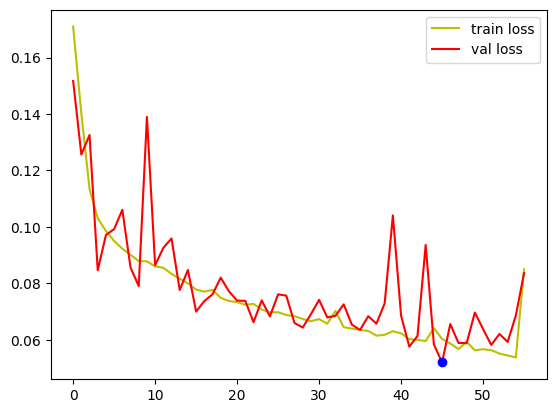

In [ ]:
plt.figure()
best=46
best=best-1
plt.plot(history['loss'], 'y', label='train loss')
plt.plot(history['val_loss'], 'r', label='val loss')
plt.plot(best,history['val_loss'][best],'ro',color='blue')
plt.legend()
print(history['loss'][best])
print(history['val_loss'][best])

In [ ]:
history['accuracy'][45]

0.9594904184341432

0.9151129722595216
0.9360802173614502


<ipython-input-54-5264f2719289>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(best,history['val_accuracy'][best],'ro', color='blue')


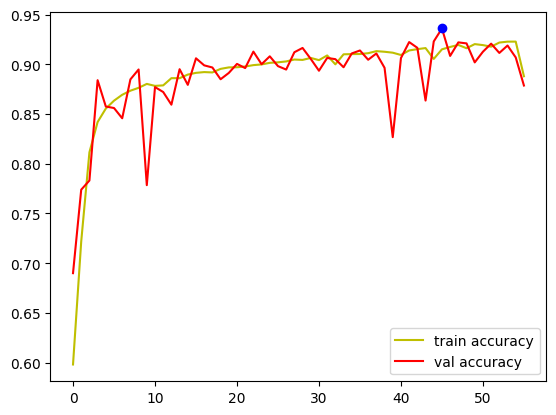

In [ ]:
plt.figure()
plt.plot(history['accuracy'], 'y', label='train accuracy')
plt.plot(history['val_accuracy'], 'r', label='val accuracy')
plt.plot(best,history['val_accuracy'][best],'ro', color='blue')
plt.legend()
print(history['accuracy'][best])
print(history['val_accuracy'][best])

In [ ]:
eval = myMdl.evaluate(x=X_test, y=Y_test)

998/998 [==============================] - 117s 117ms/step - loss: 0.0510 - accuracy: 0.9356


In [ ]:
y_pred = myMdl.predict(X_test.reshape(-1,1))

998/998 [==============================] - 119s 119ms/step


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion = confusion_matrix(Y_test, np.round(np.array(y_pred)), labels=[0,1])

In [ ]:
confusion

array([[27158,  1500],
       [  554,  2703]])

In [ ]:
TP=2703
FN=554
FP=1500
TN=27158

#acc
acc=np.round((TP+TN)/(TP+TN+FP+FN),4)
print(acc)

#Recall
recall=np.round(TP/(TP+FN), 4)
print(recall)

#Precision
precision=np.round(TP/(TP+FP),4)
print(precision)

f1score=np.round((2*recall*precision)/(recall+precision),4)
print(f1score)

0.9356
0.8299
0.6431
0.7247


In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
fpr, tpr, thresholds = roc_curve(Y_test, np.round(np.array(y_pred)))

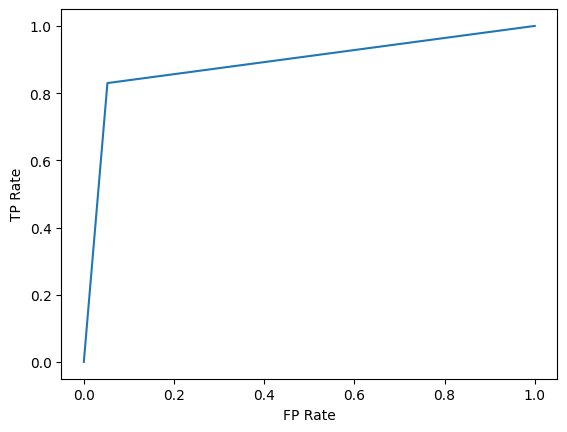

In [ ]:
import matplotlib.pyplot as plt

plt.plot(fpr, tpr)

plt.xlabel('FP Rate')
plt.ylabel('TP Rate')

plt.show()

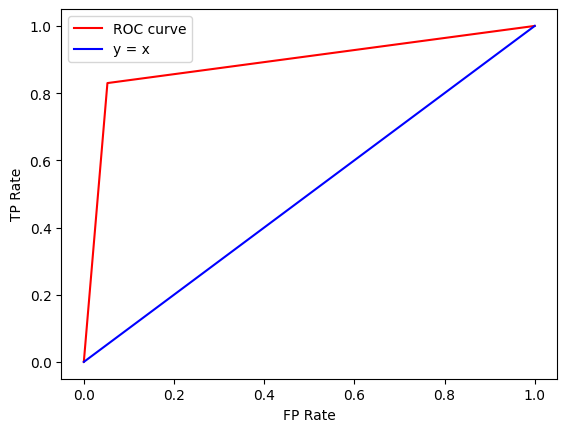

In [ ]:
plt.plot(fpr, tpr, color = 'red', label = 'ROC curve')
plt.plot([0, 1], [0, 1], color = 'blue', label = 'y = x') # y = x 직선 표시

plt.xlabel('FP Rate')
plt.ylabel('TP Rate')

plt.legend() # 그래프 라벨 표시

plt.show()

In [ ]:
print(np.round(roc_auc_score(Y_test, np.round(np.array(y_pred))),4)) # 0.985260399606944

0.8888


In [ ]:
test_text = "."
print(f'원본: {test_text}')

test_text = stemmer.stem(test_text)
print(f'전처리 후:{" ".join(np.array(voc)[encoder(test_text)])}')

prediction = myMdl.predict(np.array(test_text).reshape(-1,1))
print(f'예측 점수: {prediction}')

print(f"예측 결과: {'악성' if prediction > 0.5 else '양성'}")

원본: not fuck.
전처리 후:not fuck
1/1 [==============================] - 0s 25ms/step
예측 점수: [[0.7650479]]
예측 결과: 악성
